In [1]:
import os
import random
from datetime import datetime

path = "./Dataset/data"
labelPath = "Dataset/labels"

data = os.listdir(path)
datasetLen = len(data)

# random shuffle data
# random.shuffle(data)

In [31]:
import SimpleITK as sitk
import numpy as np
from utils import *
import os

timeStep = 0.04
numberOfIterations = 10

# Set the number of threads
# sitk.ImageRegistrationMethod().SetGlobalDefaultNumberOfThreads(1)

pathName = os.path.join(path, data[0])
originalImage = sitk.ReadImage(pathName)

curvatureImage = sitk.CurvatureFlow(originalImage, 
                                timeStep = timeStep, 
                                numberOfIterations = numberOfIterations)

pathName = os.path.join(path, data[2])
'''
originalMovingImage = sitk.ReadImage(pathName)
MovingImage = sitk.HistogramMatching(sitk.CurvatureFlow(originalMovingImage,
                                                  timeStep = timeStep, 
                                                  numberOfIterations = numberOfIterations),
                               curvatureImage)
'''
originalMovingImage = sitk.CurvatureFlow(sitk.ReadImage(pathName),
                                                  timeStep = timeStep, 
                                                  numberOfIterations = numberOfIterations)
MovingImage = sitk.HistogramMatching(originalMovingImage, curvatureImage)


In [3]:
from PIL import Image
import numpy as np

def showImg_(img, z=60):
    a = sitk.GetArrayFromImage(img[z,:,:])
    disImg = Image.fromarray(np.interp(a, (a.min(), a.max()), (0, 255)).astype('uint8'))
    disImg.show()
    
def showImg2_(img, z=60):
    disImg = Image.fromarray(sitk.GetArrayFromImage(img[z,:,:]).astype('uint8'))
    disImg.show()
    
def showImg3_(img, z=60):
    a = sitk.GetArrayFromImage(img[z,:,:])
    disImg = image.fromarray(np.interp(a, (0, 5000), (0, 255)).astype('uint8'))
    disImg.show()
    
def showImg4_(img, z=60):
    img2 = Image.fromarray(sitk.GetArrayFromImage(img[z,:,:])*60, 'L')
    img2.show()
    
def showImg5_(img):
    a = sitk.GetArrayFromImage(img)
    disImg = Image.fromarray(np.interp(a, (a.min(), a.max()), (0, 255)).astype('uint8'))
    disImg.show()
    return disImg

In [ ]:
z = 60
showImg5_(originalImage[z,:,:]).save('thesis/images/original_1.png')
showImg5_(curvatureImage[z,:,:]).save('thesis/images/curvature_1.png')

z = 100
showImg5_(originalImage[z,150:300,50:200]).save('thesis/images/original_1_1.png')
showImg5_(curvatureImage[z,150:300,50:200]).save('thesis/images/curvature_1_1.png')

z = 250
showImg5_(originalImage[:,z,:]).save('thesis/images/original_2.png')
showImg5_(curvatureImage[:,z,:]).save('thesis/images/curvature_2.png')

z = 250
showImg5_(originalImage[:,:,z]).save('thesis/images/original_3.png')
showImg5_(curvatureImage[:,:,z]).save('thesis/images/curvature_3.png')

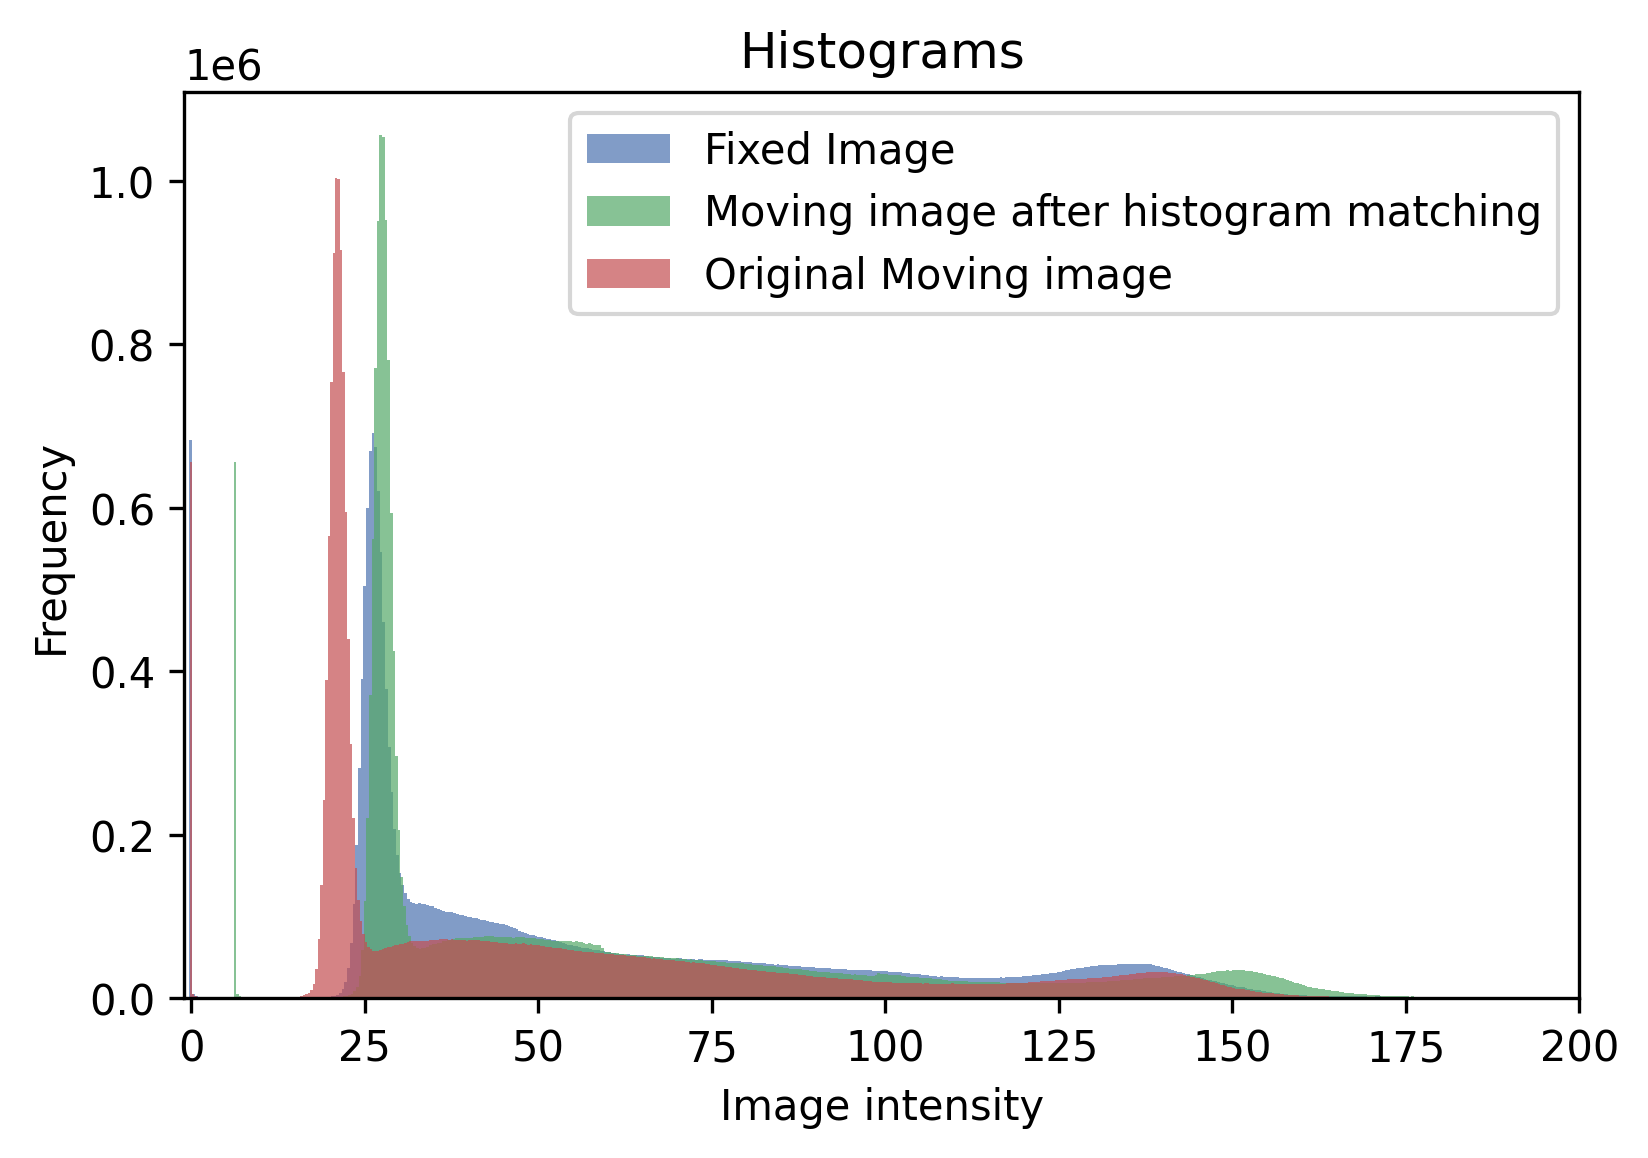

In [32]:
import matplotlib.pyplot as plt

# plt.style.use('seaborn-deep')

histogramFig, ax1 = plt.subplots(dpi=300)

plt.hist(sitk.GetArrayFromImage(curvatureImage).reshape((-1,)), bins='auto', alpha=0.7, label='Fixed Image')
_, bins, _ = plt.hist(sitk.GetArrayFromImage(MovingImage).reshape((-1,)), bins='auto', alpha=0.7, label='Moving image after histogram matching')
# plt.hist(sitk.GetArrayFromImage(originalMovingImage).reshape((-1,)), bins=bins, alpha=0.7, label='Original Moving image')
plt.hist(sitk.GetArrayFromImage(originalMovingImage).reshape((-1,)), bins='auto', alpha=0.7, label='Original Moving image')

ax1.set_xlim([-1,200])

plt.legend(loc='best')
plt.title("Histograms")
plt.xlabel("Image intensity")
plt.ylabel("Frequency")

plt.show()

histogramFig.savefig('thesis/images/histogram_plot.png')

In [39]:
z = 60
# showImg5_(curvatureImage[z,:,:]).save('thesis/images/curvature_1.png') # we got this
z = 50
showImg5_(originalMovingImage[z,:,:]).save('thesis/images/original_moving_1.png')
showImg5_(MovingImage[z,:,:]).save('thesis/images/original_moving_histogram_matching_1.png')


In [ ]:
originalImage.GetSize()

In [ ]:
sitk.GetArrayFromImage(curvatureImage).reshape((-1,)).shape

In [ ]:
np.max(sitk.GetArrayFromImage(originalMovingImage).reshape((-1,)))